# Business Case

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

**Dataset**
Dataset Link: 
<a href = https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181> delhivery_data.csv

**Column Profiling:**

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

**Concept Used:**

- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers

**How to begin:**

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

Hint: You can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their <br>
    1. Trip_uuid, Source ID and Destination ID <br>
    2. Further aggregate on the basis of just Trip_uuid. <br>
You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.

1. Basic data cleaning and exploration:
    - Handle missing values in the data.
    - Analyze the structure of the data.
    - Try merging the rows using the hint mentioned above.

2. Build some features to prepare the data for actual analysis. Extract features from the below fields:
    - Destination Name: Split and extract features out of destination. City-place-code (State)
    - Source Name: Split and extract features out of destination. City-place-code (State)
    - Trip_creation_time: Extract features like month, year and day etc

3. In-depth analysis and feature engineering:
    - Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
    - Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    - Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    - Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    - Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
    - Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
    - Handle the outliers using the IQR method.
    - Do one-hot encoding of categorical variables (like route_type)
    - Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

**Evaluation Criteria (100 Points):**

1. Define Problem Statement and perform Exploratory Data Analysis (10 points)
    - Definition of problem (as per given problem statement with additional views)
    - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
    - Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)
    - Insights based on EDA
        - Comments on range of attributes, outliers of various attributes
        - Comments on the distribution of the variables and relationship between them
        - Comments for each univariate and bivariate plot
2. Feature Creation (10 Points)
3. Merging of rows and aggregation of fields (10 Points)
4. Comparison & Visualization of time and distance fields (10 Points)
5. Missing values Treatment & Outlier treatment (10 Points)
6. Checking relationship between aggregated fields (10 Points)
7. Handling categorical values (10 Points)
8. Column Normalization /Column Standardization (10 Points)
9. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it. Eg:
    - Check from where most orders are coming from (State, Corridor etc)
    - Busiest corridor, avg distance between them, avg time taken
10. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

# Problem Statement

<font size=4 color='darkblue' style = "font-family:gorgia;" >
The company want to achieve operational excellence by understanding and processing the data coming out of data engineering pipelines. It requires addressing missing values and structuring the dataset appropriately to ensure data integrity and quality. Clean, sanitize and manipulate data to get and extract useful features out of raw fields to build forecasting models on top of it. It also requires, identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations and enhance the quality of service they provide.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Importing Dataset

In [2]:
# importing dataset as a pandas dataframe
delhvery = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [3]:
# making a copy of the dataset
df = delhvery.copy()
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Observations

<font size=4 color='darkblue' style = "font-family:gorgia;" >

1. After looking at the data, as mentioned in the business case description as well, we could see a few columns (is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'); for those, we do not have any information and description available with us. So, we will drop these columns. 
2. Delivery details of one package is divided into several rows, which requires merging the row at different levels
3. source_name and destination_name columns required splitting to extract the city, place and state information.

# 1. Basic data cleaning and exploration:

**Dropping the Unknown Fields**

In [4]:
## As per the description, there are some unknown fields present in the dataset. Thus, dropping these Unknown Fields
# df = df.drop(columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'])

## 1.1 Analyze the structure of the data.

In [5]:
# Getting the shape of the dataset
df.shape

(144867, 24)

In [6]:
# Getting the datatypes of the variables/features
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [7]:
## Getting the basic info if the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Converting to datatype of required columns to Datetime

In [8]:
# Converting the required columns' datatype to category
# df[['data', 'route_type']] = df[['data', 'route_type']].astype('category')

In [9]:
## Converting to datatype of required columns to Datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time']) 
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time']) 

### Statistical summary

In [10]:
## Data structures
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144867,2018-09-22 13:34:23.659819264,2018-09-12 00:00:16.535741,2018-09-17 03:20:51.775845888,2018-09-22 04:24:27.932764928,2018-09-27 17:57:56.350054912,2018-10-03 23:59:42.701692,NaN
od_start_time,144867,2018-09-22 18:02:45.855230720,2018-09-12 00:00:16.535741,2018-09-17 08:05:40.886155008,2018-09-22 08:53:00.116656128,2018-09-27 22:41:50.285857024,2018-10-06 04:27:23.392375,NaN
od_end_time,144867,2018-09-23 10:04:31.395393024,2018-09-12 00:50:10.814399,2018-09-18 01:48:06.410121984,2018-09-23 03:13:03.520212992,2018-09-28 12:49:06.054018048,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144867.0,961.262986,20.0,161.0,449.0,1634.0,7898.0,1037.012769
cutoff_factor,144867.0,232.926567,9.0,22.0,66.0,286.0,1927.0,344.755577
actual_distance_to_destination,144867.0,234.073372,9.000045,23.355874,66.126571,286.708875,1927.447705,344.990009
actual_time,144867.0,416.927527,9.0,51.0,132.0,513.0,4532.0,598.103621
osrm_time,144867.0,213.868272,6.0,27.0,64.0,257.0,1686.0,308.011085
osrm_distance,144867.0,284.771297,9.0082,29.9147,78.5258,343.19325,2326.1991,421.119294
factor,144867.0,2.120107,0.144,1.604264,1.857143,2.213483,77.387097,1.715421


In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
data,144867,2,training,104858
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
cutoff_timestamp,144867,93180,2018-09-24 05:19:20,40


## 1.2 Missing value detection and handling

In [12]:
## Getting the percentage of Missing Values in the dataset
df.isnull().mean().round(3)

data                              0.000
trip_creation_time                0.000
route_schedule_uuid               0.000
route_type                        0.000
trip_uuid                         0.000
source_center                     0.000
source_name                       0.002
destination_center                0.000
destination_name                  0.002
od_start_time                     0.000
od_end_time                       0.000
start_scan_to_end_scan            0.000
is_cutoff                         0.000
cutoff_factor                     0.000
cutoff_timestamp                  0.000
actual_distance_to_destination    0.000
actual_time                       0.000
osrm_time                         0.000
osrm_distance                     0.000
factor                            0.000
segment_actual_time               0.000
segment_osrm_time                 0.000
segment_osrm_distance             0.000
segment_factor                    0.000
dtype: float64

In [13]:
## As we have a significantly large dataset and missing values are also not significant. We may safely drop these rows
df.fillna('Unknown_Unknown_Unknown', inplace=True)

### Observations

<font size=4 color='darkblue' style = "font-family:gorgia;" >
    
1. After dropping the unknown fields, the dataset is of shape (144867, 19).
2. some missing values are presented in the source_name and destination_name columns. 
3. Means and Medians of the numerical columns are significantly far away, suggesting the presence of the outliers
4. Summary of data shows **1504** route_schedule_uuid, **1508** source_centers, and **1481** destination_centers for **14817** trips. 

## 1.3 Merging the rows

### Aggregating at Segment level

In [14]:
# getting the columns of the dataset
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [15]:
## Extracting the required and useful columns
seg_columns = ['trip_creation_time','route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 
               'destination_name', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
               'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance'] 

In [16]:
# Creating a dictionary that defines how to aggregate and select values
create_segment_dict = { 
    'trip_creation_time': "first",
    'route_schedule_uuid':'first',
    'route_type': "first",
    'trip_uuid': "first", 
    'source_center': "first", 
    'source_name': "first", 
    
    'destination_center': "last",
    'destination_name': "last", 
    
    'od_start_time': 'min',
    'od_end_time': 'max',
    'start_scan_to_end_scan': 'last', 
    
    'actual_distance_to_destination': 'last', 
    'actual_time': "last",       
    'osrm_time' : 'last', 
    'osrm_distance': 'last', 
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum', 
    'segment_osrm_distance' : 'sum'
}

In [17]:
## Creating a copy of the dataset
df1 = df.copy()
df1 = df1[seg_columns]

In [18]:
## Creating a unique identifier for different segments of a trip based on the combination of the trip_uuid, source, and destination
df1['segment_key'] = df1['trip_uuid'] + '_' + df1['source_center'] + '_'+ df1['destination_center']
segment_df = df1.groupby(['segment_key']).agg(create_segment_dict)
segment_df.sort_values(['segment_key', 'od_end_time'], inplace=True)
segment_df.head(4)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
segment_key,,,,,,,,,,,,,,,,,,
trip-153671041653548748_IND209304AAA_IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
trip-153671041653548748_IND462022AAA_IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
trip-153671042288605164_IND561203AAB_IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
trip-153671042288605164_IND572101AAA_IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899


In [19]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26368 entries, trip-153671041653548748_IND209304AAA_IND000000ACB to trip-153861118270144424_IND583201AAA_IND583119AAA
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              26368 non-null  datetime64[ns]
 1   route_schedule_uuid             26368 non-null  object        
 2   route_type                      26368 non-null  object        
 3   trip_uuid                       26368 non-null  object        
 4   source_center                   26368 non-null  object        
 5   source_name                     26368 non-null  object        
 6   destination_center              26368 non-null  object        
 7   destination_name                26368 non-null  object        
 8   od_start_time                   26368 non-null  datetime64[ns]
 9   od_end_time                     26368 non-null  dat

In [29]:
segment_df[segment_df['trip_uuid'] == 'trip-153741093647649320']

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
segment_key,,,,,,,,,,,,,,,,,,
trip-153741093647649320_IND388121AAA_IND388620AAB,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
trip-153741093647649320_IND388620AAB_IND388320AAA,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


### Aggregating at trip level

In [30]:
# Creating a dictionary that defines how to aggregate at trip_uuid level
create_trip_dict = { 
    'trip_creation_time': "first",
    'route_schedule_uuid':'first',
    'route_type': "first",
    'trip_uuid': "first", 
    'source_center': "first", 
    'source_name': "first", 
    'destination_center': "last",
    'destination_name': "last", 
    'od_start_time': 'min',
    'od_end_time': 'max',
    'start_scan_to_end_scan': 'sum', 
    'actual_distance_to_destination': 'sum', 
    'actual_time': "sum",       
    'osrm_time' : 'sum', 
    'osrm_distance': 'sum', 
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum', 
    'segment_osrm_distance' : 'sum'
}

In [31]:
## Grouping/merging/aggregating the rows at trip_uuid level
trip_df = segment_df.groupby(['trip_uuid']).agg(create_trip_dict)
trip_df.rename(columns=
               {'start_scan_to_end_scan': 'start_scan_to_end_scan_agg',
                'actual_distance_to_destination': 'actual_distance_to_destination_agg', 
                'actual_time': "actual_time_agg",       
                'osrm_time' : 'osrm_time_agg', 
                'osrm_distance': 'osrm_distance_agg', 
                'segment_actual_time': 'segment_actual_time_agg',
                'segment_osrm_time': 'segment_osrm_time_agg',
                'segment_osrm_distance': 'segment_osrm_distance_agg',
               }, inplace= True)
trip_df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan_agg,actual_distance_to_destination_agg,actual_time_agg,osrm_time_agg,osrm_distance_agg,segment_actual_time_agg,segment_osrm_time_agg,segment_osrm_distance_agg
trip_uuid,,,,,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [32]:
trip_df.describe(include='object').T

,count,unique,top,freq
route_schedule_uuid,14817,1504,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14817,2,Carting,8908
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
source_name,14817,934,Gurgaon_Bilaspur_HB (Haryana),1063
destination_center,14817,1042,IND000000ACB,821
destination_name,14817,1035,Gurgaon_Bilaspur_HB (Haryana),821


## Observations

<font size=4 color='darkblue' style = "font-family:gorgia;" >
    
1. After merging the rows, we could see the reduction in the source_centers and destination centers count as some intermediate source and destination centers merge for the trips.
2. We are left with **14,817** rows, i.e. one row for each trip with aggregated numerical values. For categorical variables, we have the first/last values of the segment (as per the relevance). 

# 2. Building New Features

In [33]:
## Checking the format of source_names
source_name = df1['source_name'].unique()
source_name[:20]

array(['Anand_VUNagar_DC (Gujarat)', 'Khambhat_MotvdDPP_D (Gujarat)',
       'Bhiwandi_Mankoli_HB (Maharashtra)', 'LowerParel_CP (Maharashtra)',
       'Bangalore_Nelmngla_H (Karnataka)',
       'Bengaluru_Bomsndra_HB (Karnataka)',
       'Ludhiana_GillChwk_DC (Punjab)', 'Jagraon_DC (Punjab)',
       'Raikot_DC (Punjab)', 'Junagadh_DPC (Gujarat)',
       'Veraval_DC (Gujarat)', 'Kodinar_NCplxDPP_D (Gujarat)',
       'Una_Mamlatdr_DC (Gujarat)', 'Talala_SsnRdDPP_D (Gujarat)',
       'Sonipat_Kundli_H (Haryana)', 'Roorkee_IOTCEncl_L (Uttarakhand)',
       'Haridwar (Uttarakhand)', 'MAA_Poonamallee_HB (Tamil Nadu)',
       'Ludhiana_MilrGanj_HB (Punjab)', 'Jalandhar_DPC (Punjab)'],
      dtype=object)

In [34]:
## Source Cities, places, and States
trip_df[['source_city_place_code',"source_state_dummy"]] = trip_df['source_name'].str.rsplit('(',n=1, expand=True)
trip_df[['source_state',"Dummy1"]] = trip_df['source_state_dummy'].str.split(')',n=1, expand=True)
trip_df[['source_city','source_place', 'source_code']] = trip_df['source_city_place_code'].str.split('_',n=2, expand=True)

In [35]:
## Desitination Cities, places, and States
trip_df[['destination_city_place_code',"destination_state_dummy"]] = trip_df['destination_name'].str.rsplit('(',n=1, expand=True)
trip_df[['destination_state',"Dummy2"]] = trip_df['destination_state_dummy'].str.split(')',n=1, expand=True)
trip_df[['destination_city','destination_place', 'destination_code']] = trip_df['destination_city_place_code'].str.split('_',n=2, expand=True)

In [36]:
## Dropping the dummy and repeated columns
trip_df.drop(['source_state_dummy', 'destination_state_dummy',
              'source_city_place_code','destination_city_place_code', 
              'Dummy1', 'Dummy2'], axis = 1, inplace = True)

In [37]:
## Building New Features: trip month, year, and day
trip_df["Trip_Month"] = trip_df["trip_creation_time"].dt.month
trip_df["Trip_Year"] = trip_df["trip_creation_time"].dt.year
trip_df["Trip_Day"] = trip_df["trip_creation_time"].dt.day
trip_df.head(2)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,Trip_Month,Trip_Year,Trip_Day
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,...,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6,9,2018,12
trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,...,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,9,2018,12


## Observations

<font size=4 color='darkblue' style = "font-family:gorgia;" >
    
1. The format of the source names and destination names is not consistent.

# 3. In-depth Analysis

## Exploratory Data Analysis

In [38]:
## Creating a copy
eda_df = trip_df.copy()

### Non-graphical Analysis

In [39]:
## Getting the list of numerical Columns
num_cols=eda_df.dtypes=="float64"
num_cols=list(num_cols[num_cols].index)
num_cols

['start_scan_to_end_scan_agg',
 'actual_distance_to_destination_agg',
 'actual_time_agg',
 'osrm_time_agg',
 'osrm_distance_agg',
 'segment_actual_time_agg',
 'segment_osrm_time_agg',
 'segment_osrm_distance_agg']

In [40]:
## Getting a list of the Categorical Columns
cat_cols=(eda_df.dtypes == 'object') | (eda_df.dtypes == 'category')
cat_cols=list(cat_cols[cat_cols].index)
cat_cols

['route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'source_state',
 'source_city',
 'source_place',
 'source_code',
 'destination_state',
 'destination_city',
 'destination_place',
 'destination_code']

#### Unique Value

In [41]:
## Unique values in the categorical columns
uni_cnt = pd.DataFrame(columns= ['Variables', 'Unique Values'])
for i in cat_cols:
    uni_cnt.loc[len(uni_cnt.index)] = [i, eda_df[i].nunique()]
uni_cnt

,Variables,Unique Values
0,route_schedule_uuid,1504
1,route_type,2
2,trip_uuid,14817
3,source_center,938
4,source_name,934
5,destination_center,1042
6,destination_name,1035
7,source_state,29
8,source_city,735
9,source_place,708


In [42]:
## After closely observing the data, we can see that the old and new names of the same city (Bengaluru/Bangalore) are being used. The old city name is being changed to the new name. 
eda_df.loc[eda_df[eda_df["source_city"] == 'Bangalore'].index, 'source_city'] = 'Bengaluru'
eda_df.loc[eda_df[eda_df["source_place"] == 'Bangalore'].index, 'source_place'] = 'Bengaluru'
eda_df.loc[eda_df[eda_df["destination_city"] == 'Bangalore'].index, 'destination_city'] = 'Bengaluru'
eda_df.loc[eda_df[eda_df["destination_place"] == 'Bangalore'].index, 'destination_place'] = 'Bengaluru'

#### Value Counts

In [43]:
## Getting the value counts and Proportions for categorical columns
cat_cols_trimed= ['route_type', 'source_name', 'destination_name', 'source_state', 
                  'source_city', 'source_place', 'destination_state', 'destination_city', 
                  'destination_place']

for i in cat_cols_trimed:
    print("Value counts and Proportions of "+i, "\n")
    print(pd.DataFrame({
        "Count": eda_df[i].value_counts(),
        "Proportion": eda_df[i].value_counts(normalize=True).round(2)
    }).head(10))
    print("*"*50)

Value counts and Proportions of route_type 

            Count  Proportion
route_type                   
Carting      8908         0.6
FTL          5909         0.4
**************************************************
Value counts and Proportions of source_name 

                                   Count  Proportion
source_name                                         
Gurgaon_Bilaspur_HB (Haryana)       1063        0.07
Bhiwandi_Mankoli_HB (Maharashtra)    697        0.05
Bangalore_Nelmngla_H (Karnataka)     624        0.04
Bengaluru_Bomsndra_HB (Karnataka)    455        0.03
Pune_Tathawde_H (Maharashtra)        396        0.03
Mumbai Hub (Maharashtra)             300        0.02
Bengaluru_KGAirprt_HB (Karnataka)    295        0.02
Hyderabad_Shamshbd_H (Telangana)     278        0.02
Kolkata_Dankuni_HB (West Bengal)     245        0.02
Delhi_Airport_H (Delhi)              237        0.02
**************************************************
Value counts and Proportions of destination_name 



### Graphical Analysis

In [44]:
## Creating anothor copy of the merged dataframe
geo_df = trip_df.copy()

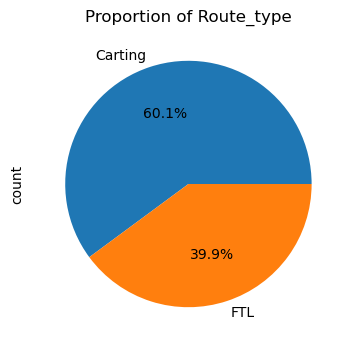

In [45]:
## Route Type
plt.figure(figsize=(4,4));
ax=eda_df.route_type.value_counts().plot(kind = 'pie', autopct='%.1f%%');
plt.title('Proportion of Route_type');

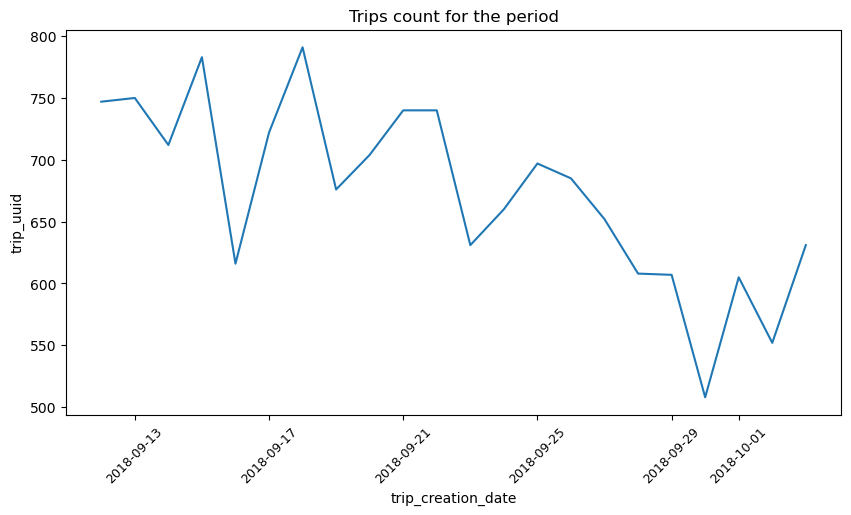

In [46]:
# #Trips count day by day
eda_df['trip_creation_date'] = eda_df['trip_creation_time'].dt.date
ts = eda_df.groupby(['trip_creation_date'])['trip_uuid'].count()
plt.figure(figsize=(10,5));
sns.lineplot(ts);
plt.xticks(rotation=45, fontsize=9);
plt.title('Trips count for the period');

### Checking from where most orders are coming from (State, Corridor etc)

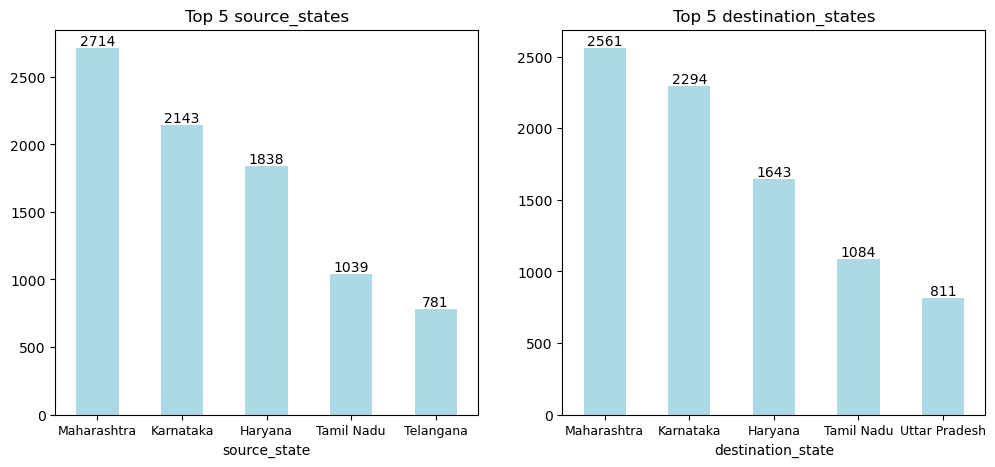

In [47]:
## Major sourcing and destination states
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = eda_df['source_state'].value_counts().head().plot(kind= "bar", color= 'lightblue');
plt.title('Top 5 source_states')
plt.xticks(rotation = 0, fontsize = 9);
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = eda_df['destination_state'].value_counts().head().plot(kind= "bar", color= 'lightblue');
plt.title('Top 5 destination_states')
plt.xticks(rotation = 0, fontsize = 9);
ax.bar_label(ax.containers[0], fmt = '%g');

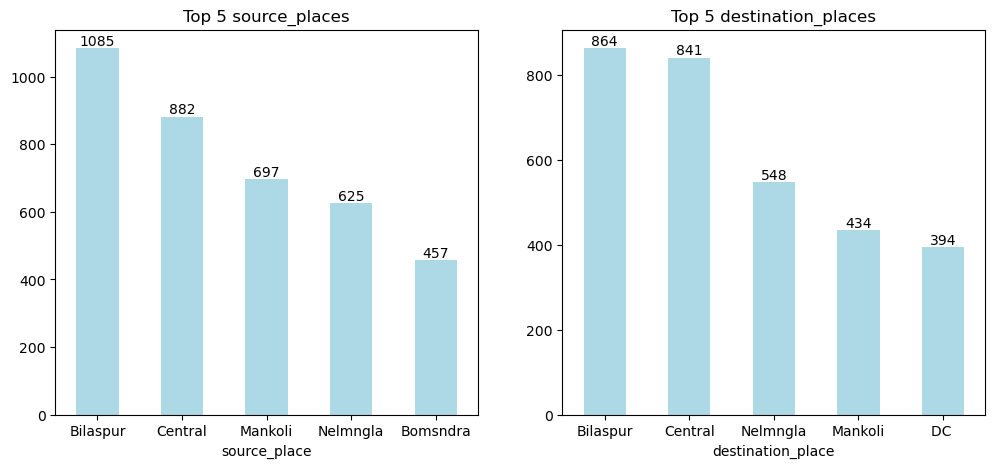

In [48]:
## Major sourcing and destination place
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = eda_df['source_place'].value_counts().head().plot(kind= "bar", color= 'lightblue');
plt.title('Top 5 source_places')
plt.xticks(rotation = 0, fontsize = 10);
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = eda_df['destination_place'].value_counts().head().plot(kind= "bar", color= 'lightblue');
plt.title('Top 5 destination_places')
plt.xticks(rotation = 0, fontsize = 10);
ax.bar_label(ax.containers[0], fmt = '%g');

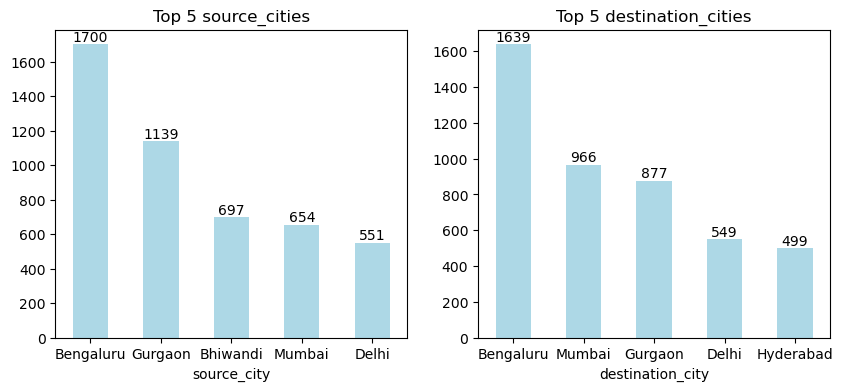

In [49]:
## Major sourcing and destination places
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ax =eda_df['source_city'].value_counts().head().plot(kind= "bar", color= 'lightblue');
plt.title('Top 5 source_cities')
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = eda_df['destination_city'].value_counts().head().plot(kind= "bar", color= 'lightblue');
plt.title('Top 5 destination_cities')
plt.xticks(rotation = 0);
ax.bar_label(ax.containers[0]);

### Busiest corridor, avg distance between them, avg time taken

<font size = 4 color = 'green' style= 'font-family:gorgia;'  >
To get the busiest corridor, here we will have to include both up and down trips (from and to the dc). Assuming busiest corridor refers to the most number of trips between two stations. To get that, we'll need to do a self join on source and destination station of the left table  == desination and source station of the right table resp.


In [50]:
## Creating a dictionary to aggregate the required columns meaningfully
sdc_agg = {'trip_uuid': 'nunique', 'actual_distance_to_destination_agg':'mean', 'actual_time_agg': 'mean'} 

## Grouping the data as per source and destination
sdc = eda_df.groupby(['source_center','destination_center','source_place','source_city','source_state', 
                      'destination_place','destination_city', 
                      'destination_state'])[["trip_uuid", 
                                             'actual_distance_to_destination_agg', 
                                             'actual_time_agg']].agg(sdc_agg).sort_values(by ='trip_uuid', ascending=False)
sdc = sdc.reset_index()
sdc = sdc.round(2)
sdc.rename(
    columns= {
        'trip_uuid':'Total Trips',
        'actual_distance_to_destination_agg':"Average_Distance (Kms)",
        'actual_time_agg': 'Aveage_Time (mins)'
}, inplace = True)

In [51]:
## Defining the corridor based on source and destinations to include Up and down trips 
sdc['source_corridor'] = sdc['source_center'] + ' <--> '+ sdc["destination_center"]
sdc['destination_corridor'] = sdc['destination_center'] + ' <--> ' + sdc["source_center"]
sdc['corridor'] = sdc['source_place'] + " (" + sdc['source_city'] + ")" + " ←→ " + sdc['destination_place'] +  " (" + sdc['destination_city'] + ")"

a1 = sdc.set_index('source_corridor')
a2 = sdc.set_index('destination_corridor')

## Creating a self join with source and destination
corridors = pd.merge(a1, a2, left_index = True, right_index=True)

In [52]:
## Aggregating the values for up and down trip
corridors.loc[:,'Total Trips'] = corridors.loc[:,['Total Trips_x', 'Total Trips_y']].sum(axis=1, min_count=1)
corridors.loc[:,'Average_Distance (Kms)'] = corridors.loc[:, ['Average_Distance (Kms)_x','Average_Distance (Kms)_y']].mean(axis=1)
corridors.loc[:,'Aveage_Time (mins)'] = corridors.loc[:, ['Aveage_Time (mins)_x', 'Aveage_Time (mins)_y']].mean(axis=1)
corridors.head(1)

,source_center_x,destination_center_x,source_place_x,source_city_x,source_state_x,destination_place_x,destination_city_x,destination_state_x,Total Trips_x,Average_Distance (Kms)_x,...,destination_city_y,destination_state_y,Total Trips_y,Average_Distance (Kms)_y,Aveage_Time (mins)_y,source_corridor,corridor_y,Total Trips,Average_Distance (Kms),Aveage_Time (mins)
IND562132AAA <--> IND560300AAA,IND562132AAA,IND560300AAA,Nelmngla,Bengaluru,Karnataka,KGAirprt,Bengaluru,Karnataka,151,28.02,...,Bengaluru,Karnataka,108,28.08,105.23,IND560300AAA <--> IND562132AAA,KGAirprt (Bengaluru) ←→ Nelmngla (Bengaluru),259,28.05,96.55


In [53]:
## Getting the list of columns, to select and drop the unnessary columns 
corridors.columns

Index(['source_center_x', 'destination_center_x', 'source_place_x',
       'source_city_x', 'source_state_x', 'destination_place_x',
       'destination_city_x', 'destination_state_x', 'Total Trips_x',
       'Average_Distance (Kms)_x', 'Aveage_Time (mins)_x',
       'destination_corridor', 'corridor_x', 'source_center_y',
       'destination_center_y', 'source_place_y', 'source_city_y',
       'source_state_y', 'destination_place_y', 'destination_city_y',
       'destination_state_y', 'Total Trips_y', 'Average_Distance (Kms)_y',
       'Aveage_Time (mins)_y', 'source_corridor', 'corridor_y', 'Total Trips',
       'Average_Distance (Kms)', 'Aveage_Time (mins)'],
      dtype='object')

In [54]:
## Dropping the unwanted columns
corridors.drop(
    columns= [
        'source_center_x', 'destination_center_x', 'source_place_x',
        'source_city_x', 'source_state_x', 'destination_place_x',
        'destination_city_x', 'destination_state_x', 'Total Trips_x',
        'Average_Distance (Kms)_x', 'Aveage_Time (mins)_x',
        'destination_corridor', "corridor_y",'source_center_y', 'destination_center_y',
        'source_place_y', 'source_city_y', 'source_state_y',
        'destination_place_y', 'destination_city_y', 'destination_state_y',
        'Total Trips_y', 'Average_Distance (Kms)_y', 'Aveage_Time (mins)_y',
        'source_corridor'], inplace=True)

In [55]:
## Dropping the duplicate set of values
corridors.drop_duplicates(subset= ['Total Trips', 'Average_Distance (Kms)', 'Aveage_Time (mins)'], inplace = True)
corridors.rename(columns={'corridor_x': 'Corridors'}, inplace=True)
corridors.set_index('Corridors', inplace =True)
corridors.sort_values(by=['Total Trips'], ascending= False, inplace =True)
corridors.head(10)

,Total Trips,Average_Distance (Kms),Aveage_Time (mins)
Corridors,,,
Nelmngla (Bengaluru) ←→ KGAirprt (Bengaluru),259,28.050,96.550
Bilaspur (Gurgaon) ←→ Bilaspur (Gurgaon),248,1497.570,2591.530
Bomsndra (Bengaluru) ←→ KGAirprt (Bengaluru),207,41.865,125.255
Bbganj (Muzaffrpur) ←→ Bbganj (Muzaffrpur),192,186.420,719.700
Nelmngla (Bengaluru) ←→ Bomsndra (Bengaluru),178,43.805,105.700
Bilaspur (Gurgaon) ←→ Kundli (Sonipat),178,70.140,213.360
Tathawde (Pune) ←→ Mankoli (Bhiwandi),128,101.090,218.835
Hub (Chennai) ←→ Poonamallee (MAA),110,31.515,72.770
Trnsport (Bhopal) ←→ Trnsport (Bhopal),96,683.700,1343.580


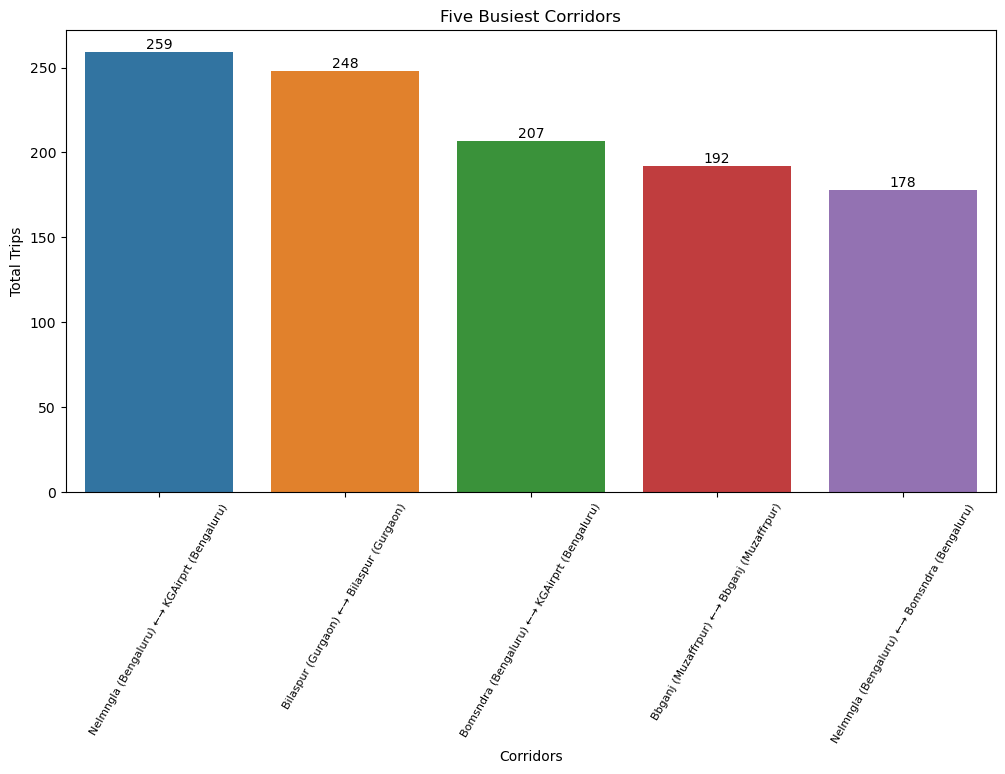

In [56]:
## Plotting the busiest corridors 
plt.figure(figsize=(12,6))
ax = sns.barplot(data = corridors.head(), x=corridors.head().index, y='Total Trips');
plt.title('Five Busiest Corridors');
plt.xticks(rotation=60, fontsize=8);
plt.bar_label(ax.containers[0]);

In [57]:
eda_df[num_cols].corr().round(2)

,start_scan_to_end_scan_agg,actual_distance_to_destination_agg,actual_time_agg,osrm_time_agg,osrm_distance_agg,segment_actual_time_agg,segment_osrm_time_agg,segment_osrm_distance_agg
start_scan_to_end_scan_agg,1.00,0.92,0.96,0.93,0.92,0.96,0.92,0.92
actual_distance_to_destination_agg,0.92,1.00,0.95,0.99,1.00,0.95,0.99,0.99
actual_time_agg,0.96,0.95,1.00,0.96,0.96,1.00,0.95,0.96
osrm_time_agg,0.93,0.99,0.96,1.00,1.00,0.96,0.99,0.99
osrm_distance_agg,0.92,1.00,0.96,1.00,1.00,0.96,0.99,0.99
segment_actual_time_agg,0.96,0.95,1.00,0.96,0.96,1.00,0.95,0.96
segment_osrm_time_agg,0.92,0.99,0.95,0.99,0.99,0.95,1.00,1.00
segment_osrm_distance_agg,0.92,0.99,0.96,0.99,0.99,0.96,1.00,1.00


<AxesSubplot:>

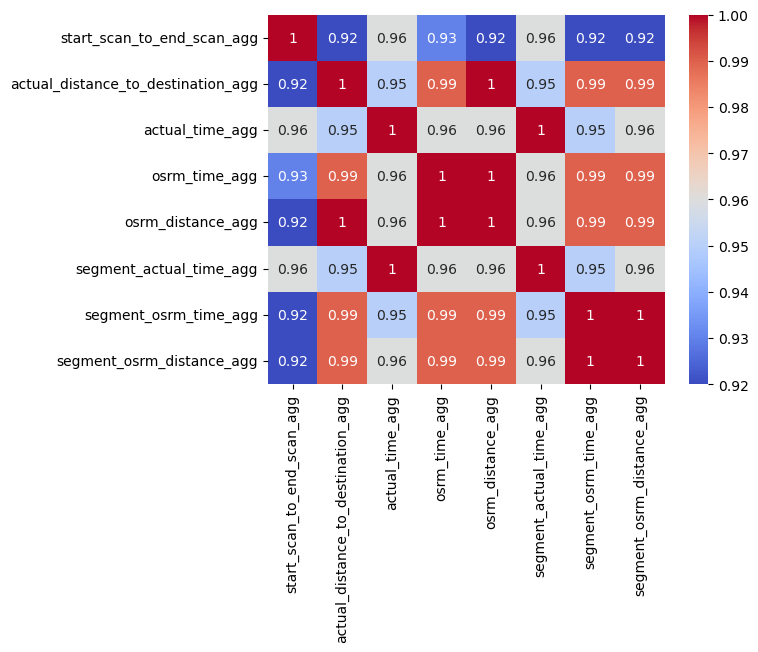

In [58]:
sns.heatmap(eda_df[num_cols].corr().round(2), cmap='coolwarm', annot=True)

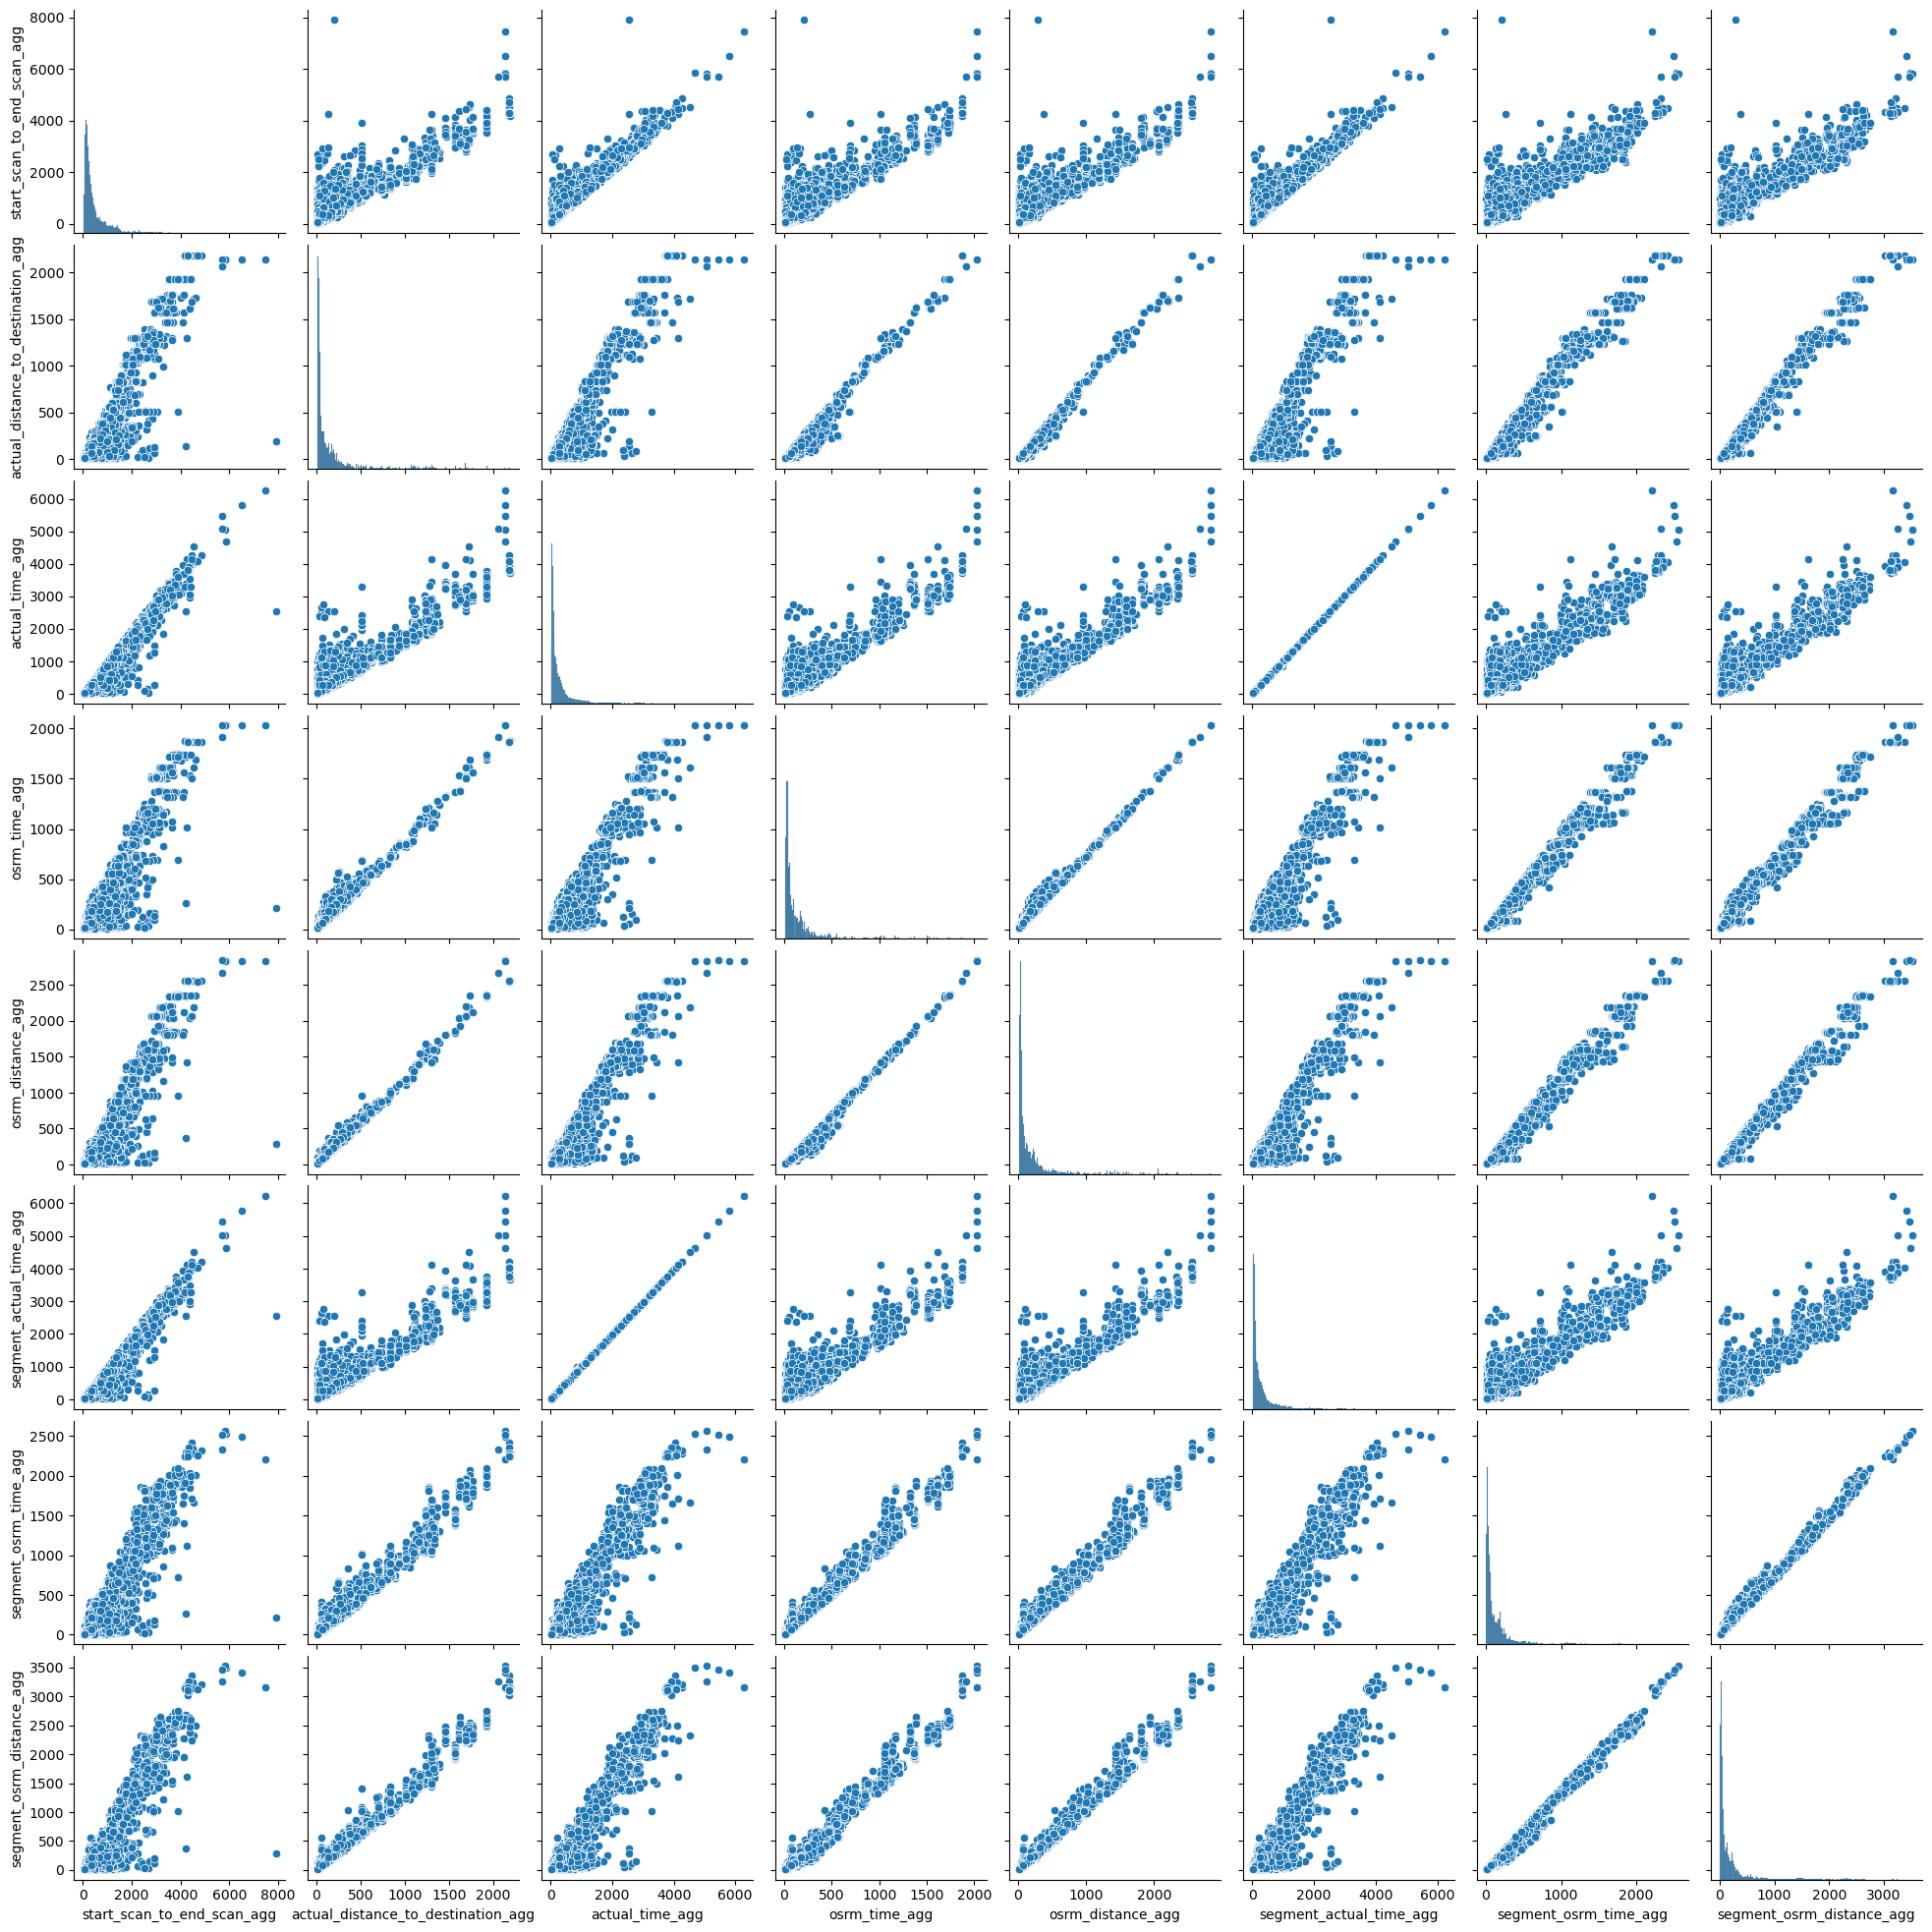

In [59]:
sns.pairplot(eda_df[num_cols]);

## Observations

<font size=4 color='darkblue' style = "font-family:gorgia;" >
    
1. We have two categories of route_type (FTL and Carting). 60% of the shipments are Carting, and 40% are FTL.
2. The company has a vast network expanded over 800+ cities in 31 states.
3. After closely observing the data, we can see that the old and new names of the same city (Bengaluru/Bangalore) are being used. The old city name is being changed to the new name.
4. 'Gurgaon_Bilaspur_HB (Haryana)' is the company's major DC, managing ~7% of the deliveries.
5. Maharastra and Karnataka are the major states of operations, managing 18% and 14% of the deliveries, respectively.
6. Bengaluru is the central city of operation.  
7. We could observe the downtrend for the given period.
8. Most orders come from the Bengaluru city.
9. Gurgaon_Bilaspur_HB (Haryana) is the top source_center
10. Nelmngla (Bengaluru) ←→ KGAirprt (Bengaluru) is the busiest corridor 
11. Numerical variables are highly correlated

## Hypothesis Testing

### 3.1 Time taken between od_start_time and od_end_time.

In [60]:
## Creating a copy of the dataset
df_merged = trip_df.copy() 

In [61]:
# time taken between od_start_time and od_end_time.
# df_merged['od_time_diff_hour'] = (df_merged['od_end_time']-df_merged['od_start_time'])/np.timedelta64(1,'h')
df_merged['od_time_diff_min'] = (df_merged['od_end_time']-df_merged['od_start_time'])/np.timedelta64(1,'m')
df_merged.drop(['od_end_time', 'od_start_time'], axis = 1, inplace = True)
df_merged.head(1)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan_agg,actual_distance_to_destination_agg,...,source_place,source_code,destination_state,destination_city,destination_place,destination_code,Trip_Month,Trip_Year,Trip_Day,od_time_diff_min
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,...,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6,9,2018,12,2260.1098


In [ ]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

### 3.2 Comparing od_start_end_min and start_scan_to_end_scan

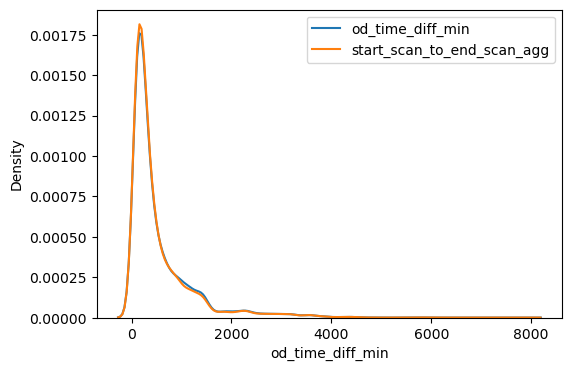

In [52]:
plt.figure(figsize=(6,4))
sns.kdeplot(data = df_merged, x = 'od_time_diff_min')
sns.kdeplot(data = df_merged, x = 'start_scan_to_end_scan_agg')
plt.legend(['od_time_diff_min', 'start_scan_to_end_scan_agg'])
plt.show()

In [53]:
print(f"Average start_scan_to_end_scan_agg for a trip: {df_merged['start_scan_to_end_scan_agg'].mean().round(2)} minutes")
print(f"Average od_time_diff_min for a trip: {df_merged['od_time_diff_min'].mean().round(2)} minutes")

Average start_scan_to_end_scan_agg for a trip: 530.78 minutes
Average od_time_diff_min for a trip: 547.48 minutes


**Normality Test**

In [133]:
from scipy.stats import shapiro, kstest, norm

stat,pvalue = shapiro(df_merged['od_time_diff_min'])
pvalue

E:\Setup\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [119]:
stat,pvalue = shapiro(df_merged['start_scan_to_end_scan_agg'])
pvalue

0.0

**Log Transformation**

<AxesSubplot:xlabel='od_time_diff_min', ylabel='Density'>

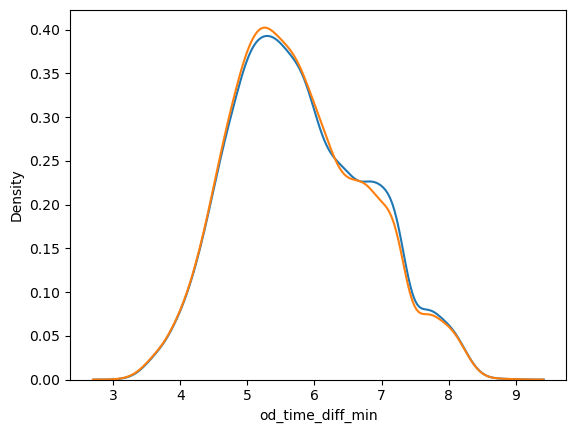

In [121]:
sns.kdeplot(x=np.log(df_merged['od_time_diff_min']))
sns.kdeplot(x=np.log(df_merged['start_scan_to_end_scan_agg']))

In [123]:
stat,pvalue = shapiro(np.log(df_merged['od_time_diff_min']))
pvalue

3.6009639357383973e-35

In [125]:
stat,pvalue = shapiro(np.log(df_merged['start_scan_to_end_scan_agg']))
pvalue

4.987681649639618e-35

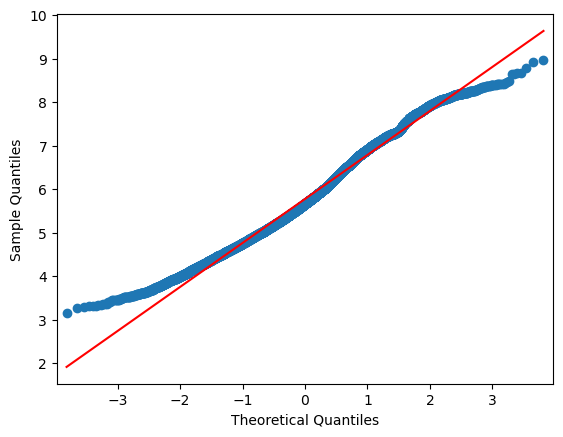

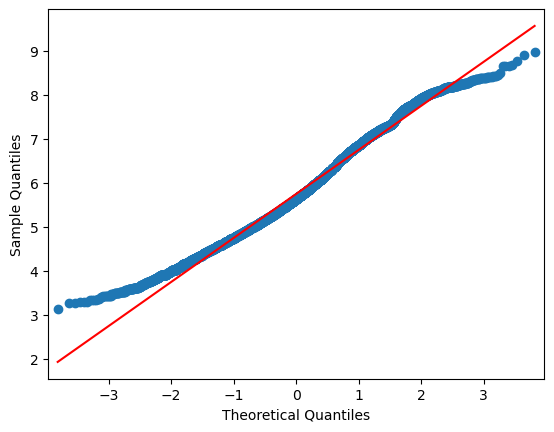

In [129]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(df_merged["od_time_diff_min"]),line="s")
plt.show()
qqplot(np.log(df_merged["start_scan_to_end_scan_agg"]),line="s")
plt.show()

In [134]:
log_od=np.log(df_merged["od_time_diff_min"])
z_od=(log_od-log_od.mean())/log_od.std()
kstest(z_od,norm.cdf)

KstestResult(statistic=0.04680935763791033, pvalue=1.1877886437686246e-28)

In [54]:
## H0: Means are Same
## Ha: Means aren't same

# assumed significance level -> 0.05
alpha = 0.05
tstat, pvalue = ttest_ind(df_merged['start_scan_to_end_scan_agg'], df_merged['od_time_diff_min'], alternative='less')

## Printing Result and Inference
if pvalue < alpha:
    print(f"pvalue is: {np.round(pvalue,4)}\nInference: Reject H0: Means are not same")
else:
    print(f"pvalue is:{np.round(pvalue,4)}\nInference: Failed to Reject H0: Means are same")

pvalue is: 0.0152
Inference: Reject H0: Means are not same


<font size=4 color='darkblue' style = "font-family:gorgia;" >

#### Conclusion
- Rejecting the Null Hypothesis
- There is a statistically significant difference between od_start_end_time and start_scan_to_end_scan_time.
- By closely observing, there is a significant gap among od_end_time of the segments and od_start_time of the next segments of a trip

### 3.3 Actual_time aggregated value and OSRM time aggregated value

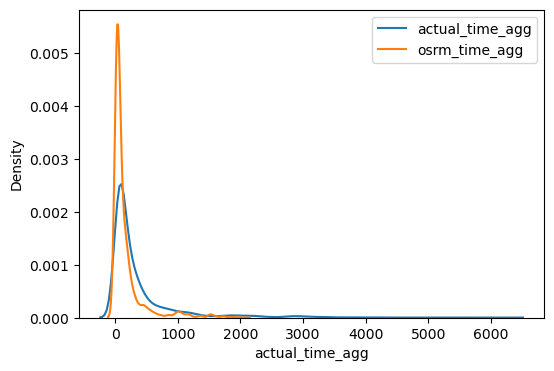

In [55]:
plt.figure(figsize=(6,4))
sns.kdeplot(data = df_merged, x = 'actual_time_agg')
sns.kdeplot(data = df_merged, x = 'osrm_time_agg')
plt.legend(['actual_time_agg', 'osrm_time_agg'])
plt.show()

In [56]:
print(f"Average actual_time for a trip: {df_merged['actual_time_agg'].mean().round(2)} minutes")
print(f"Average OSRM_time for a trip: {df_merged['osrm_time_agg'].mean().round(2)} minutes")

Average actual_time for a trip: 357.14 minutes
Average OSRM_time for a trip: 161.38 minutes


In [57]:
## H0: Means are Same
## Ha: Means aren't same

# assumed significance level -> 0.05
alpha = 0.05
tstat,pvalue = ttest_ind(df_merged["actual_time_agg"], df_merged["osrm_time_agg"], alternative='greater')

## Printing Result and Inference
if pvalue < alpha:
    print(f"pvalue is: {np.round(pvalue,4)}\nInference: Reject H0: Means are not same")
else:
    print(f"pvalue is:{np.round(pvalue,4)}\nInference: Failed to Reject H0: Means are same")

pvalue is: 0.0
Inference: Reject H0: Means are not same


<font size=4 color='darkblue' style = "font-family:gorgia;" >

#### Conclusion
- Rejecting the Null Hypothesis
- There is a statistically significant difference between actual_time_agg and osrm_time_agg.
- It suggests the logistic losses for the trip and suggests the scope of improvement

### 3.4 OSRM distance aggregated value and segment OSRM distance aggregated value

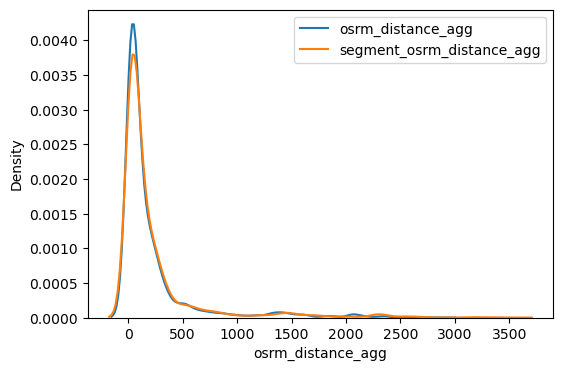

In [58]:
plt.figure(figsize=(6,4))
sns.kdeplot(data = df_merged, x = 'osrm_distance_agg')
sns.kdeplot(data = df_merged, x = 'segment_osrm_distance_agg')
plt.legend(['osrm_distance_agg', 'segment_osrm_distance_agg'])
plt.show()

In [59]:
print(f"Average osrm_distance_agg for a trip: {df_merged['osrm_distance_agg'].mean().round(2)} Km")
print(f"Average segment_osrm_distance_agg for a trip: {df_merged['segment_osrm_distance_agg'].mean().round(2)} Km")

Average osrm_distance_agg for a trip: 204.34 Km
Average segment_osrm_distance_agg for a trip: 223.2 Km


In [60]:
## H0: Means are Same
## Ha: Means aren't same

# assumed significance level -> 0.05
alpha = 0.05
tstat, pvalue = ttest_ind(df_merged["osrm_distance_agg"], df_merged["segment_osrm_distance_agg"], alternative='less')

## Printing Result and Inference
if pvalue < alpha:
    print(f"pvalue is: {np.round(pvalue,4)}\nInference: Reject H0: Means are not same")
else:
    print(f"pvalue is:{np.round(pvalue,4)}\nInference: Failed to Reject H0: Means are same")

pvalue is: 0.0
Inference: Reject H0: Means are not same


<font size=4 color='darkblue' style = "font-family:gorgia;" >

#### Conclusion
- Rejecting the Null Hypothesis
- There is a statistically significant difference between osrm_distance_agg and segment_osrm_distance_agg.
- It suggests the logistic losses for the trip due to not following the optimal routes, thus suggesting the scope for improvement

### 3.5 OSRM time aggregated value and segment OSRM time aggregated value

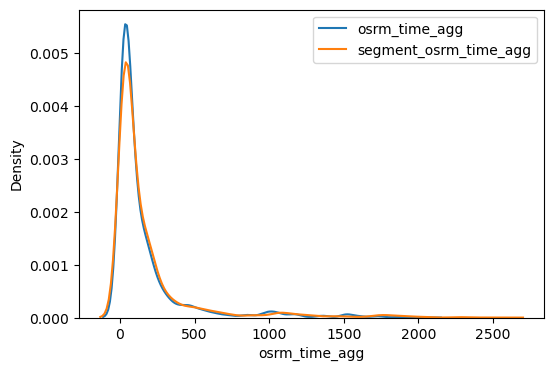

In [61]:
plt.figure(figsize=(6,4))
sns.kdeplot(data = df_merged, x = 'osrm_time_agg')
sns.kdeplot(data = df_merged, x = 'segment_osrm_time_agg')
plt.legend(['osrm_time_agg', 'segment_osrm_time_agg'])
plt.show()

In [62]:
print(f"Average osrm_time_agg for a trip: {df_merged['osrm_time_agg'].mean().round(2)} minutes")
print(f"Average segment_osrm_time_agg for a trip: {df_merged['segment_osrm_time_agg'].mean().round(2)} minutes")

Average osrm_time_agg for a trip: 161.38 minutes
Average segment_osrm_time_agg for a trip: 180.95 minutes


In [63]:
## H0: Means are Same
## Ha: Means aren't same

# assumed significance level -> 0.05
alpha = 0.05
tstat, pvalue = ttest_ind(df_merged["osrm_time_agg"], df_merged["segment_osrm_time_agg"], alternative='less')

## Printing Result and Inference
if pvalue < alpha:
    print(f"pvalue is: {np.round(pvalue,4)}\nInference: Reject H0: Means are not same")
else:
    print(f"pvalue is:{np.round(pvalue,4)}\nInference: Failed to Reject H0: Means are same")

pvalue is: 0.0
Inference: Reject H0: Means are not same


<font size=4 color='darkblue' style = "font-family:gorgia;" >
    
#### Conclusion
- Rejecting the Null Hypothesis
- There is a statistically significant difference between osrm_time_agg and segment_osrm_time_agg, which suggests improvements in selecting the optimal route.

### 3.6 Outliers Detection and Handling using the IQR method.

In [64]:
def plot_distribution(col):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,3))
    sns.kdeplot(col, ax=ax[0], color = 'green')
    ax[0].axvline(col.mean(), color='blue', linestyle='dashed',linewidth=0.75)
    ax[0].axvline(col.median(), color='red', linestyle='dashdot', linewidth=0.75)
    ax[0].legend({'Mean':col.mean(),'Median':col.median()})
    
    sns.boxplot(x=col, showmeans=True, ax=ax[1], color='cyan')
    plt.tight_layout()

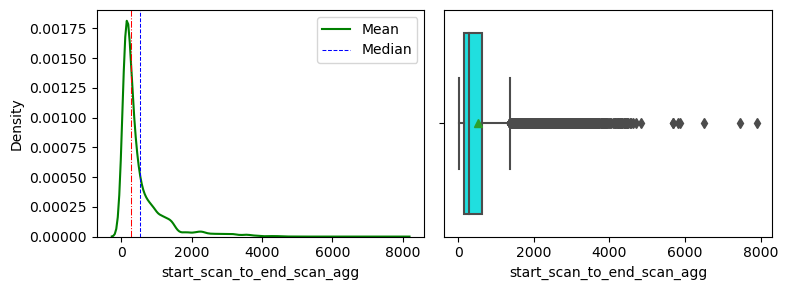

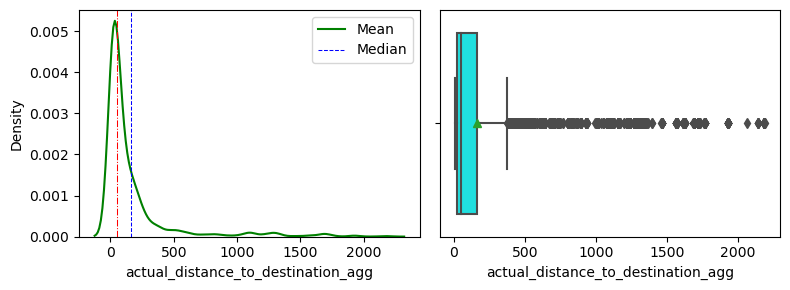

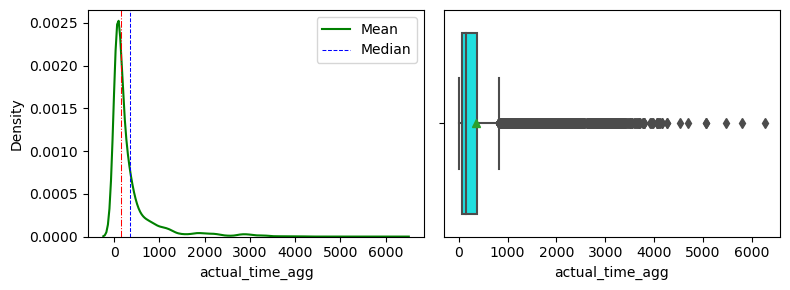

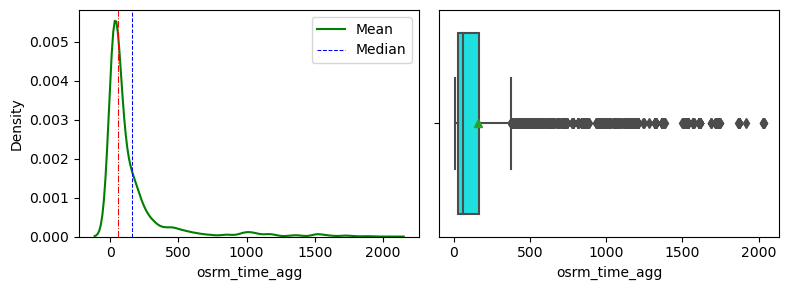

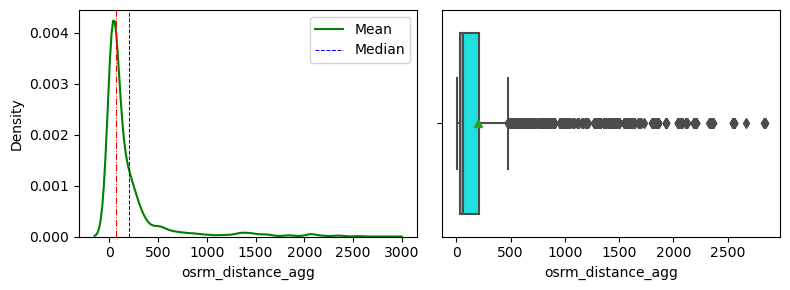

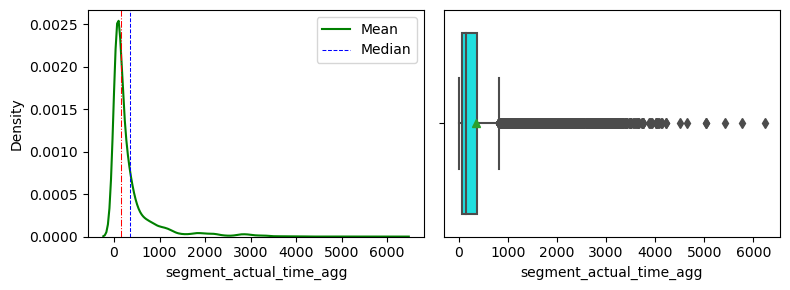

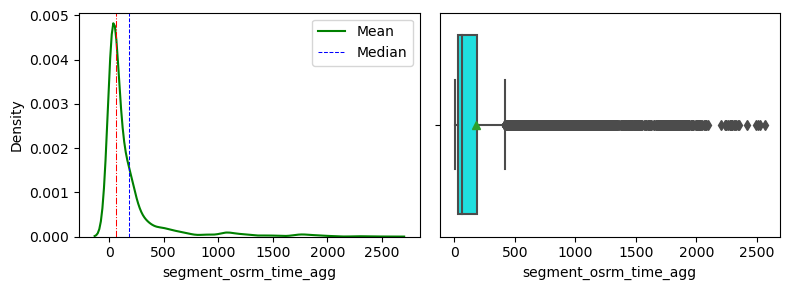

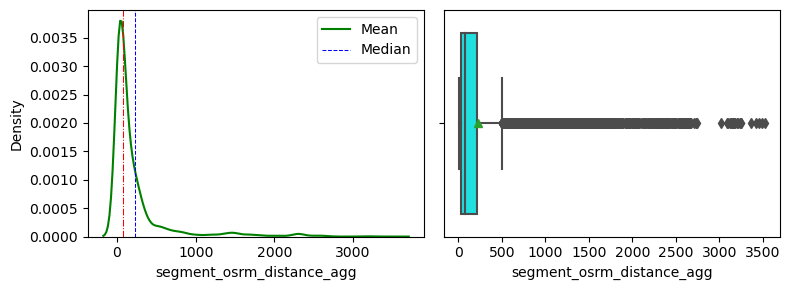

In [65]:
for ncol in num_cols:
    plot_distribution(df_merged[ncol])
plt.show()

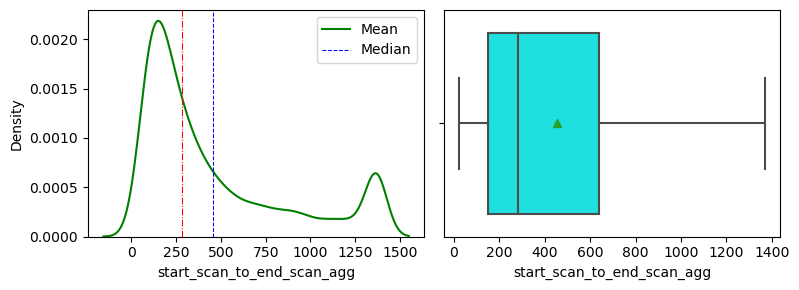

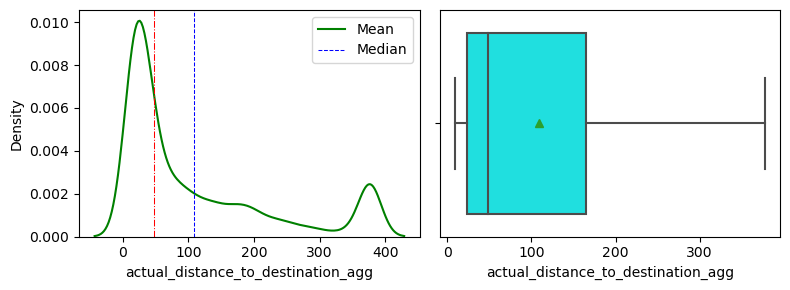

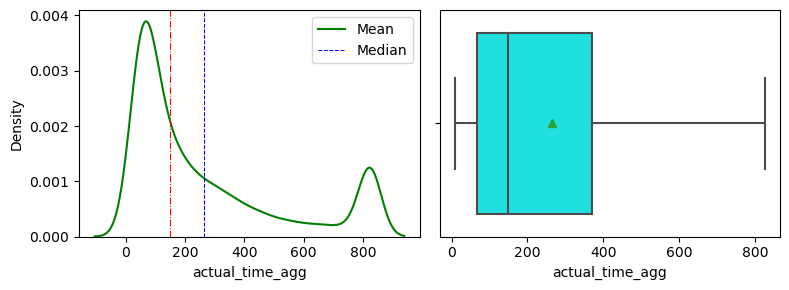

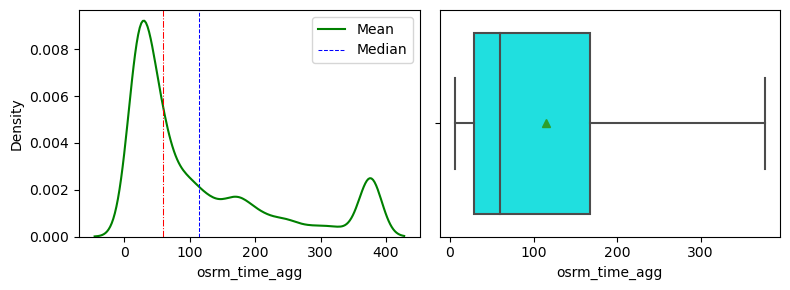

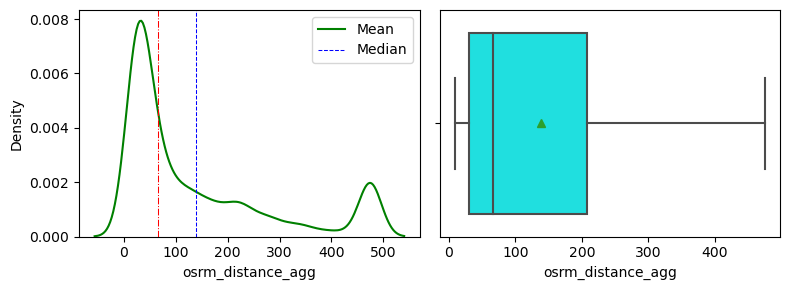

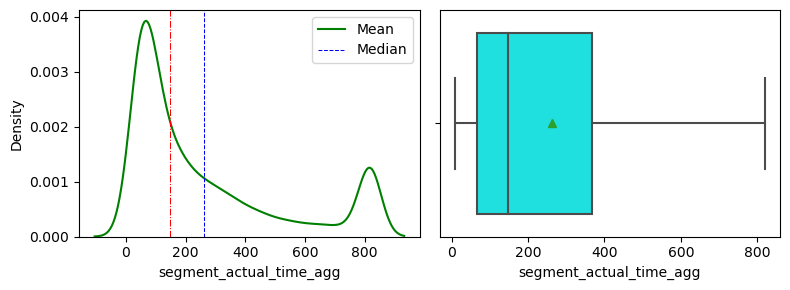

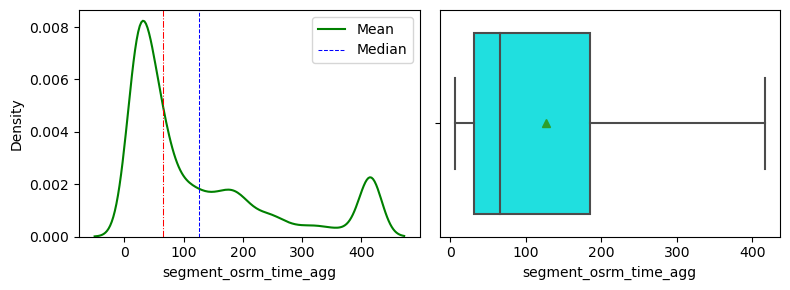

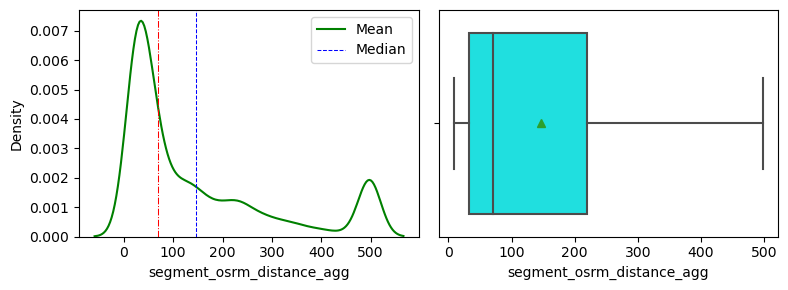

In [66]:
#treating outliers:

def treat_outlier(col):
    #Takes two parameters: dataframe & variable of interest as string
    q1,q3=np.percentile(col,[25,75])
    iqr = q3-q1
    lo_range = q1-(1.5*iqr)
    up_range = q3+(1.5*iqr)
    return lo_range,up_range

for col in num_cols:
    ir,ur=treat_outlier(df_merged[col])
    df_merged[col]=np.where(df_merged[col]>ur,ur,df_merged[col])
    df_merged[col]=np.where(df_merged[col]<ir,ir,df_merged[col])
    
for ncol in num_cols:
    plot_distribution(df_merged[ncol])
plt.show()

### 3.6 Encoding

In [67]:
# One-hot encoding
df_merged = pd.get_dummies(df_merged, columns=['route_type'], dtype='int')
df_merged.head(1)

,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan_agg,actual_distance_to_destination_agg,actual_time_agg,...,destination_state,destination_city,destination_place,destination_code,Trip_Month,Trip_Year,Trip_Day,od_time_diff_min,route_type_Carting,route_type_FTL
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1369.0,377.202161,824.5,...,Uttar Pradesh,Kanpur,Central,H_6,9,2018,12,2260.1098,0,1


### 3.7 Normalisation and Standardisation

In [68]:
## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [69]:
## Normalisation
df_merged_normalised = df_merged.copy()
df_merged_normalised[num_cols] = MinMaxScaler().fit_transform(df_merged_normalised[num_cols])
df_merged_normalised[num_cols].round(2).head()

,start_scan_to_end_scan_agg,actual_distance_to_destination_agg,actual_time_agg,osrm_time_agg,osrm_distance_agg,segment_actual_time_agg,segment_osrm_time_agg,segment_osrm_distance_agg
trip_uuid,,,,,,,,
trip-153671041653548748,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
trip-153671042288605164,0.12,0.17,0.16,0.17,0.16,0.16,0.14,0.15
trip-153671043369099517,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
trip-153671046011330457,0.06,0.02,0.06,0.02,0.02,0.06,0.02,0.02
trip-153671052974046625,0.52,0.32,0.41,0.30,0.30,0.41,0.27,0.28


In [70]:
## Standardization
df_merged_standard = df_merged.copy()
df_merged_standard[num_cols] = StandardScaler().fit_transform(df_merged_standard[num_cols])
df_merged_standard[num_cols].round(2).head()

,start_scan_to_end_scan_agg,actual_distance_to_destination_agg,actual_time_agg,osrm_time_agg,osrm_distance_agg,segment_actual_time_agg,segment_osrm_time_agg,segment_osrm_distance_agg
trip_uuid,,,,,,,,
trip-153671041653548748,2.23,2.28,2.15,2.25,2.28,2.15,2.26,2.26
trip-153671042288605164,-0.67,-0.31,-0.46,-0.40,-0.36,-0.47,-0.48,-0.40
trip-153671043369099517,2.23,2.28,2.15,2.25,2.28,2.15,2.26,2.26
trip-153671046011330457,-0.86,-0.78,-0.79,-0.86,-0.80,-0.78,-0.86,-0.82
trip-153671052974046625,0.64,0.16,0.30,0.02,0.06,0.30,-0.09,-0.00


# Insights

<font size=4 color='darkblue' style = "font-family:gorgia;" >

* There is presence of outliers in almost all the variable and the data is right skewed
* Almost all the features are heavy positively correleated with each other & which is intutive as well.
* We have two categories of route_type (FTL and Carting). 60% of the shipments are Carting, and 40% are FTL.
* The company has a vast network expanded over 800+ cities in 31 states.
* After closely observing the data, we can see that the old and new names of the same city (Bengaluru/Bangalore) are being used. The old city name is being changed to the new name.
* 'Gurgaon_Bilaspur_HB (Haryana)' is the company's primary DC, managing ~7% of the deliveries.
* Maharastra and Karnataka are the major states of operations, managing 18% and 14% of the deliveries, respectively.
* Bengaluru is the central city of operation.
* We could observe the downtrend for the given period.
* Most orders come from the Bengaluru city.
* Gurgaon_Bilaspur_HB (Haryana) is the top source_center
* **Nelmngla (Bengaluru) ←→ KGAirprt (Bengaluru)** is the busiest corridor 
* Numerical variables are highly correlated

**Observations from the Hypothesis Testing**
1. There is a statistically significant difference between od_start_end_time and start_scan_to_end_scan_time. Because the start_scan_to_end_scan_time is calculated for the segment, there is a significant difference between the od_end_time of a segment and the od_start_time of the subsequent segment of a trip. 
2. There is a statistically significant difference between actual_time_agg and osrm_time_agg. It suggests the logistic losses for the trip and suggests the scope for improvement
3. There is a statistically significant difference between osrm_distance_agg and segment_osrm_distance_agg. It suggests the logistic losses for the trip due to not following the optimal routes, thus suggesting the scope for improvement.
4. There is a statistically significant difference between osrm_time_agg and segment_osrm_time_agg, which suggests improvements in selecting the optimal route.

# Recommendations

<font size=4 color='darkblue' style = "font-family:gorgia;" >

1. Hypothesis testing identified the inefficiencies in the operations. There is a need and scope for the improvement in selecting the optimal path, following the recommended path, and reduce the logistic losses during the trip.
2. The company should plan to reduce the time gap between the different segments of a trip
3. The company should plan to reduce the gap between actual and OSRM distance and time. Also the actual distance/time and  consolidated segment  distance/time.